# Task Description : 
Develop a Generalized Linear regression model to predict the **Internal energy (U) of saturated vapor** for the given **pressure data (P)** **(see in code line 2)**. Please keep in mind the following:


*   1 bonus point - **(functioning model)** and 1 bonus point - **(top 5 models)**.
*   Submission Deadline is **May 26, 23:59**.
*   Please submit only .ipynb file for consistency.
*   Donot copy code from other students otherwise you will not be graded.
*   Try to write the code cleanly and only write what is asked in the final submission file.





*We expect you to upload only 'one' python file with name ***Exercise_3_Task_yourname*** on elearning in exactly the same format as explained below.*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Upload training data here
data = pd.read_csv('data\Superheated_vapor_training_data.csv')

data.head()

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
1,10.0,U,191.8220,2438.0000,2479.7000,2515.6000,2551.6000,2588.0000,2624.5000,2661.4000,...,NaN,3049.8000,NaN,3132.3000,NaN,3216.6000,NaN,3302.6000,NaN,3390.3000
2,10.0,H,191.8320,2584.8000,2640.0000,2687.5000,2735.2000,2783.1000,2831.2000,2879.6000,...,NaN,3383.5000,NaN,3489.1000,NaN,3596.5000,NaN,3705.5000,NaN,3816.3000
3,10.0,S,0.6493,8.1511,8.3168,8.4486,8.5722,8.6888,8.7994,8.9045,...,NaN,9.7572,NaN,9.8984,NaN,10.0329,NaN,10.1616,NaN,10.2849
4,20.0,U,251.4320,2456.9000,2478.4000,2514.6000,2550.9000,2587.4000,2624.1000,2661.0000,...,NaN,3049.7000,NaN,3132.3000,NaN,3216.5000,NaN,3302.5000,NaN,3390.2000


In [6]:
# Perform data cleaning if required and define corresponding variables for [inputs /features]  and [corresponding output (Experimental values)]
# Please note: Input/Feature is Pressure and Output is Internal Energy for saturated vapor

# Extract Internal energy data from the entire datafreme
U_data = data.loc[data["Property"] == "U"]

# Extract 'Pressure' and 'Internal Energy' data for the saturated vapor from the dataframe
P = U_data["Pressure"]
U = U_data["Vap_Sat"]

# Define Feature and Lable variables
X = np.array(P).reshape(-1, 1)
y = np.array(U)


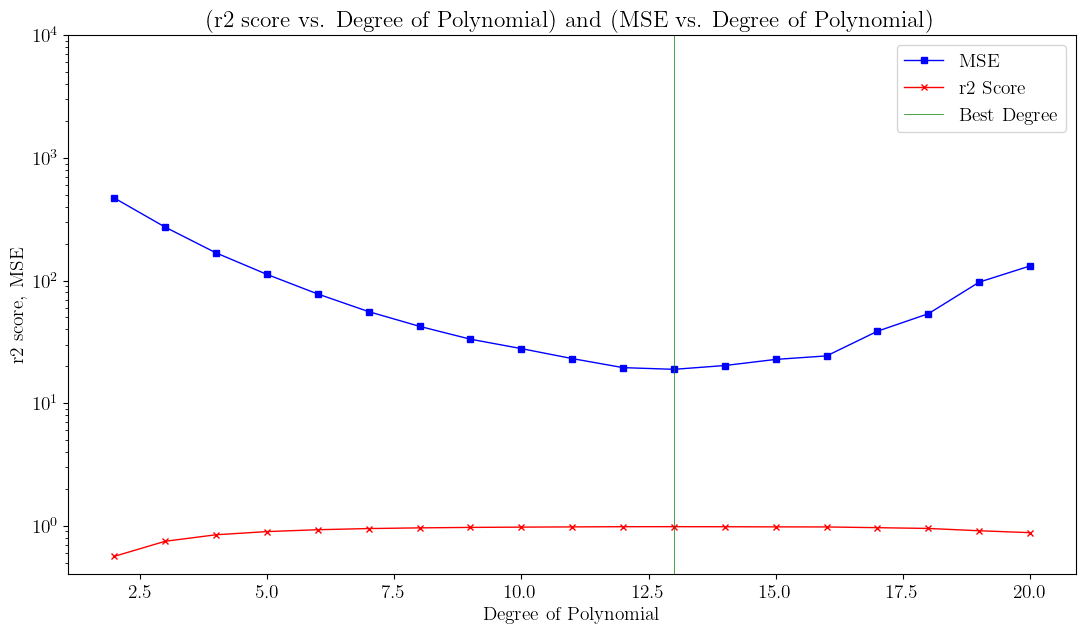

The Best value of the degree of polynomial: 13


In [7]:
# Do cross validation with different values of degree of polynomial and visualize (R2_square vs degree of polynomial and MSE vs degree of polynomial) to know what 'degree of polynomial' value performs best on your testing data.

degree = np.arange(2, 21, 1).astype(int)
y_pred = []

for i in degree:
    model = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=i, include_bias=False)),
            ("scaler", StandardScaler()),
            ("lin_reg", LinearRegression()),
        ]
    )
    model.fit(X, y)
    score = cross_val_predict(model, X, y, cv=LeaveOneOut())
    y_pred.append(score)

MSE = []
R2 = []

for i in y_pred:
    MSE.append(mean_squared_error(y, i))
    R2.append(r2_score(y, i))

plt.figure(figsize=(13, 7))
plt.plot(degree, MSE, "bs-", markersize=5, linewidth=1, label="MSE")
plt.plot(degree, R2, "rx-", markersize=5, linewidth=1, label="r2 Score")
plt.axvline(
    x=degree[np.argmin(MSE)],
    color="g",
    linestyle="-",
    linewidth="0.5",
    label="Best Degree",
)
plt.yscale("log")
plt.ylim(0, 10e3)
plt.xlabel("Degree of Polynomial")
plt.ylabel("r2 score, MSE")
plt.title("(r2 score vs. Degree of Polynomial) and (MSE vs. Degree of Polynomial)")
plt.legend()
plt.show()

print("The Best value of the degree of polynomial:", degree[np.argmin(MSE)])

In [8]:
# train your final model using all the data points with your 'degree of polynomial value (Please do not calculate any performance metrics, we will do that on our own by checking performance of your model on our testing dataset)

model_best = Pipeline(
    [
        # ("poly", PolynomialFeatures(degree=degree[np.argmin(MSE)], include_bias=False)),
        ("poly", PolynomialFeatures(degree=25, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ]
)

model_best.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

MSE: 99.56839873990887
R2: 0.9563766580945225


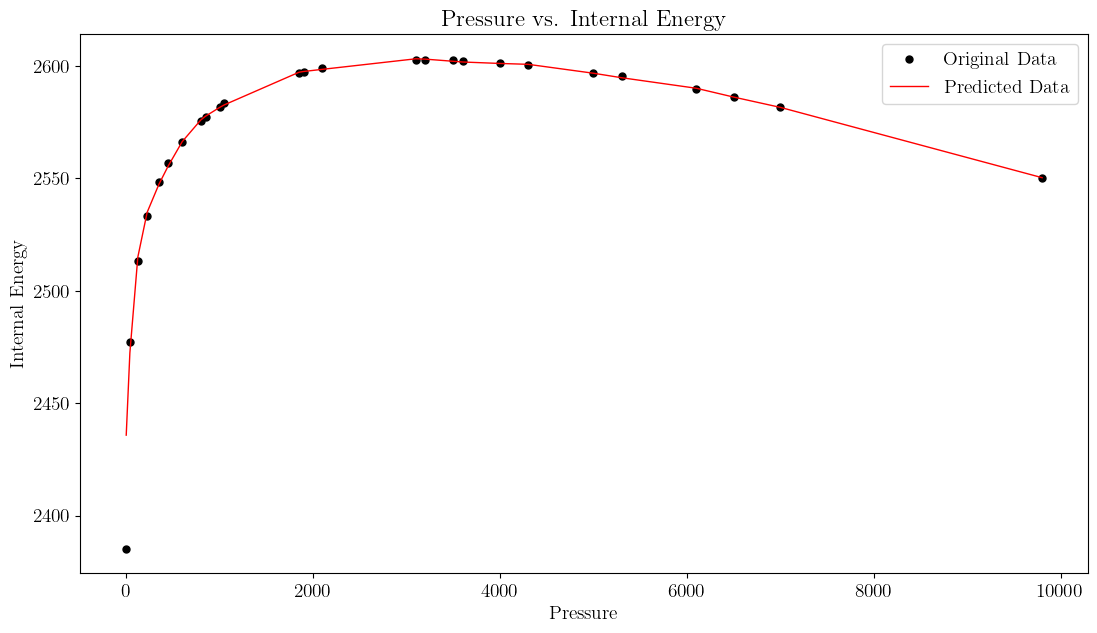

In [9]:
# Test your model on the testing data and report the performance metrics (MSE and R2_square) on the testing data
data_test = pd.read_csv('data\Superheated_vapor_testing_data.csv')
U_data = data_test.loc[data_test["Property"] == "U"]

P = U_data["Pressure"]
U = U_data["Vap_Sat"]

# Define feature and label variables
X = np.array(P).reshape(-1, 1)
y = np.array(U)

# Predict the values of the testing data
y_pred = model_best.predict(X)
print("MSE:", mean_squared_error(y, y_pred))
print("R2:", r2_score(y, y_pred))

# Visualize the predicted values of the testing data along with the original data
plt.figure(figsize=(13, 7))
plt.plot(X, y, "ko", markersize=5, label="Original Data")
plt.plot(X, y_pred, "r", linewidth=1, label="Predicted Data")
plt.xlabel("Pressure")
plt.ylabel("Internal Energy")
plt.title("Pressure vs. Internal Energy")
plt.legend()
plt.show()
